<a href="https://colab.research.google.com/github/SemihAkkoc/machine_learning/blob/main/hidden_markov_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import tensorflow_probability as tfp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
"""
1. Cold days are encoded by a 0 and hot days are encodeded by a 1.
2. The first day in our sequence has 80% chance of being cold.
3. A cold day has a 30% chance of being followed by a hot day.
4. A hot day has a 20% chance of being followed by a cold day.
5. On each day the temperature is normally distributed with 
mean and standard deviation 0 and 5 on a cold day and mean and 
standard deviation 15 and 10 on a hot day.
"""

initial_distribution = tfp.distributions.Categorical(probs=[0.8, 0.2])  # refer to point 2
transition_distribution = tfp.distributions.Categorical(probs=[[0.7, 0.3],[0.2, 0.8]])  # refer to point 3,4
observation_distribution = tfp.distributions.Normal(loc=[0., 15.], scale=[5.,10.])  # refer to point 5

In [9]:
# creating the model
model = tfp.distributions.HiddenMarkovModel(initial_distribution=initial_distribution,
                                            transition_distribution=transition_distribution, 
                                            observation_distribution=observation_distribution,
                                            num_steps=7)  # num_steps is how many times we are going to run

[2.9999998 5.9999995 7.4999995 8.25      8.625001  8.812501  8.90625  ]


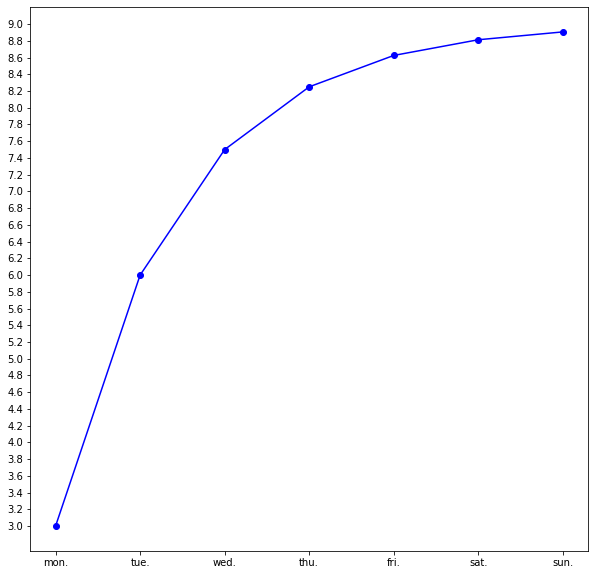

In [19]:
mean = model.mean()

with tf.compat.v1.Session() as sess:
    print(mean.numpy())


days = ['mon.', 'tue.', 'wed.', 'thu.', 'fri.', 'sat.', 'sun.']
plt.figure(figsize=(10,10))
plt.plot(days, mean.numpy(), 'ob-')
plt.yticks(np.arange(np.min(mean.numpy()),np.max(mean.numpy())+0.1, 0.2))
plt.show()